### Q2 MLR ASSIGNMENT

#### Predict Price of the computer

#### A dataframe containing :

##### price : price in US dollars of 486 PCs

##### speed : clock speed in MHz

##### hd : size of hard drive in MB

##### ram : size of Ram in in MB

##### screen : size of screen in inches

##### cd : is a CD-ROM present ?

##### multi : is a multimedia kit (speakers, sound card) included ?

##### premium : is the manufacturer was a "premium" firm (IBM, COMPAQ) ?

##### ads : number of 486 price listings for each month 

##### trend : time trend indicating month starting from January of 1993 to November of 1995.



In [2]:
# Multilinear Regression
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# loading the data
computer = pd.read_csv("Computer_Data.csv")
#print(computer)

In [5]:
computer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6259 entries, 0 to 6258
Data columns (total 11 columns):
S.no       6259 non-null int64
price      6259 non-null int64
speed      6259 non-null int64
hd         6259 non-null int64
ram        6259 non-null int64
screen     6259 non-null int64
cd         6259 non-null object
multi      6259 non-null object
premium    6259 non-null object
ads        6259 non-null int64
trend      6259 non-null int64
dtypes: int64(8), object(3)
memory usage: 538.0+ KB


In [6]:
computer.describe()

,S.no,price,speed,hd,ram,screen,ads,trend
count,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000,6259.000000
mean,3130.000000,2219.576610,52.011024,416.601694,8.286947,14.608723,221.301007,15.926985
std,1806.961999,580.803956,21.157735,258.548445,5.631099,0.905115,74.835284,7.873984
min,1.000000,949.000000,25.000000,80.000000,2.000000,14.000000,39.000000,1.000000
25%,1565.500000,1794.000000,33.000000,214.000000,4.000000,14.000000,162.500000,10.000000
50%,3130.000000,2144.000000,50.000000,340.000000,8.000000,14.000000,246.000000,16.000000
75%,4694.500000,2595.000000,66.000000,528.000000,8.000000,15.000000,275.000000,21.500000
max,6259.000000,5399.000000,100.000000,2100.000000,32.000000,17.000000,339.000000,35.000000


In [7]:
computer.isnull().values.any()

False

In [8]:
comp = computer.drop(["S.no","cd","multi","premium"],axis=1)
comp

,price,speed,hd,ram,screen,ads,trend
0,1499,25,80,4,14,94,1
1,1795,33,85,2,14,94,1
2,1595,25,170,4,15,94,1
3,1849,25,170,8,14,94,1
4,3295,33,340,16,14,94,1
...,...,...,...,...,...,...,...
6254,1690,100,528,8,15,39,35
6255,2223,66,850,16,15,39,35
6256,2654,100,1200,24,15,39,35
6257,2195,100,850,16,15,39,35


In [1]:
comp.dtypes

In [8]:
comp.corr()
#no sign of multicollinearity

,price,speed,hd,ram,screen,ads,trend
price,1.000000,0.300976,0.430258,0.622748,0.296041,0.054540,-0.199987
speed,0.300976,1.000000,0.372304,0.234760,0.189074,-0.215232,0.405438
hd,0.430258,0.372304,1.000000,0.777726,0.232802,-0.323222,0.577790
ram,0.622748,0.234760,0.777726,1.000000,0.208954,-0.181670,0.276844
screen,0.296041,0.189074,0.232802,0.208954,1.000000,-0.093919,0.188614
ads,0.054540,-0.215232,-0.323222,-0.181670,-0.093919,1.000000,-0.318553
trend,-0.199987,0.405438,0.577790,0.276844,0.188614,-0.318553,1.000000


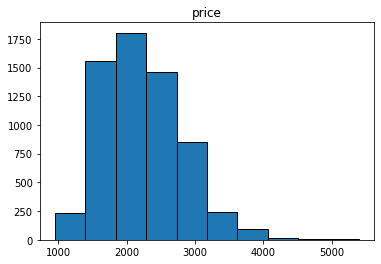

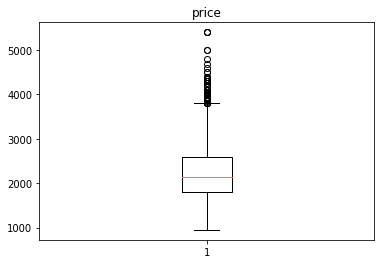

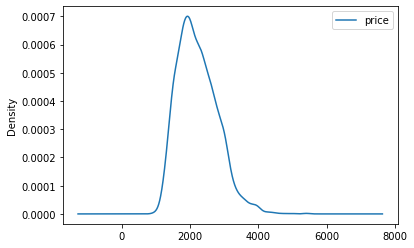

In [9]:
plt.hist(comp["price"],edgecolor="black")
plt.title("price")
plt.show()

plt.boxplot(comp["price"])
plt.title("price")
plt.show()

pd.DataFrame(comp.price).plot.density()
plt.show()

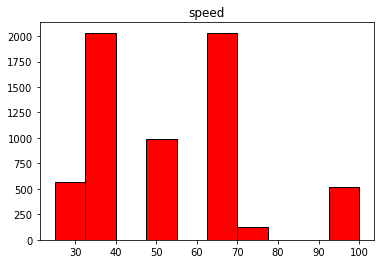

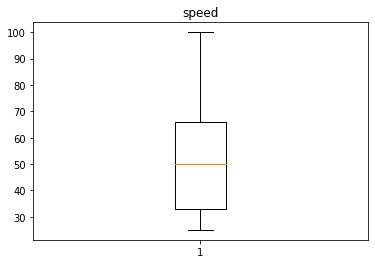

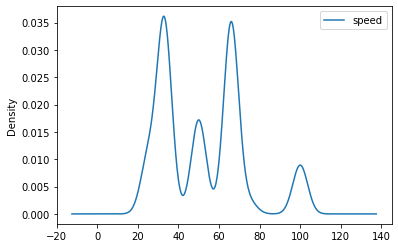

In [10]:
plt.hist(comp.speed,color="red" , edgecolor = "black")
plt.title("speed")
plt.show()

plt.boxplot(comp["speed"])
plt.title("speed")
plt.show()

pd.DataFrame(comp.speed).plot.density()
plt.show()

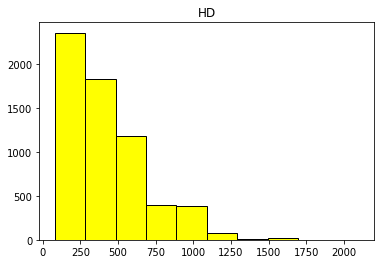

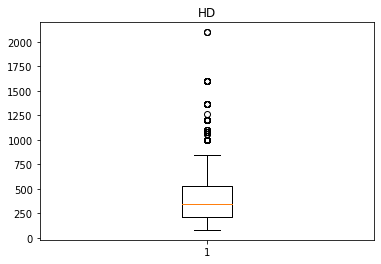

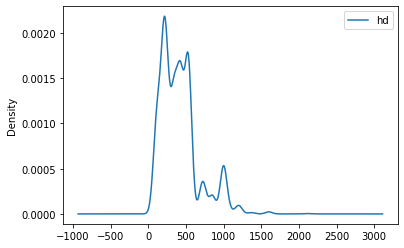

In [11]:
plt.hist(comp.hd, color="yellow", edgecolor="black")
plt.title("HD")
plt.show()

plt.boxplot(comp.hd,)
plt.title("HD")
plt.show()

pd.DataFrame(comp.hd).plot.density()
plt.show()

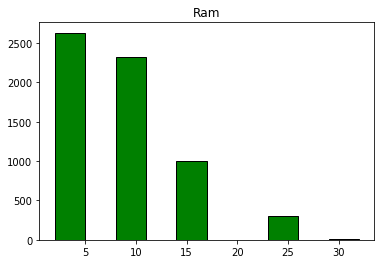

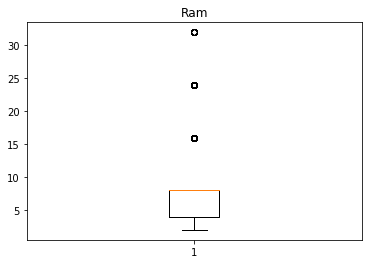

<function matplotlib.pyplot.show(*args, **kw)>

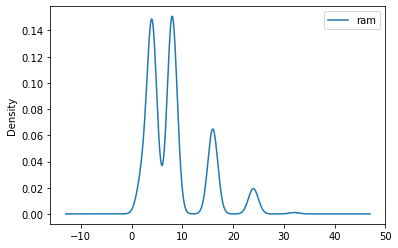

In [12]:
plt.hist(comp.ram, color="green", edgecolor="black")
plt.title("Ram")
plt.show()

plt.boxplot(comp.ram)
plt.title("Ram")
plt.show()

pd.DataFrame(comp.ram).plot.density()
plt.show

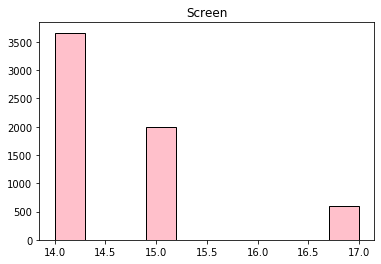

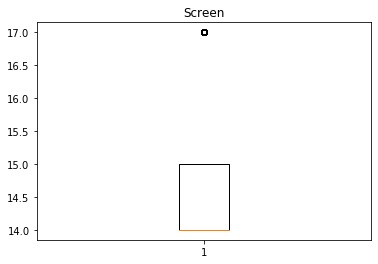

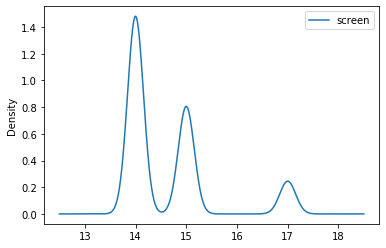

In [13]:
plt.hist(comp.screen, color="pink", edgecolor="black")
plt.title("Screen")
plt.show()

plt.boxplot(comp.screen)
plt.title("Screen")
plt.show

pd.DataFrame(comp.screen).plot.density()
plt.show()

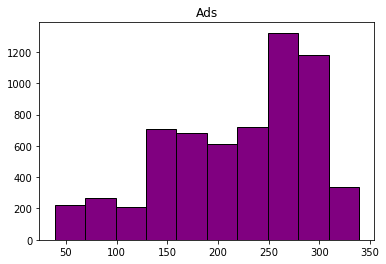

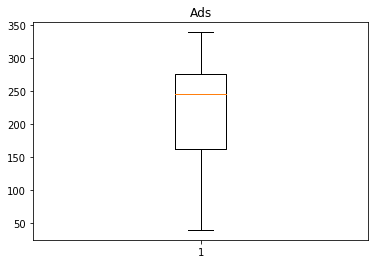

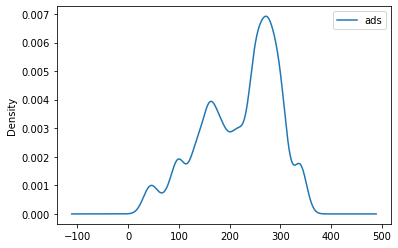

In [14]:
plt.hist(comp.ads, color="purple", edgecolor="black")
plt.title("Ads")
plt.show()

plt.boxplot(comp.ads)
plt.title("Ads")
plt.show()

pd.DataFrame(comp.ads).plot.density()
plt.show()

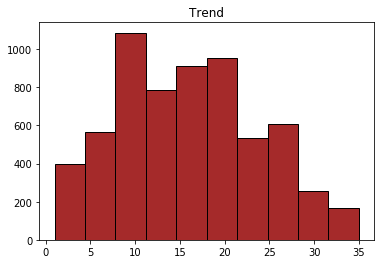

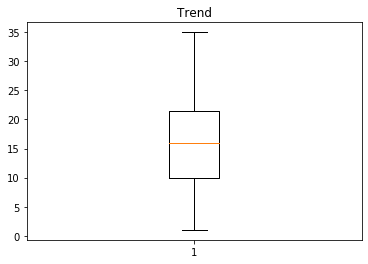

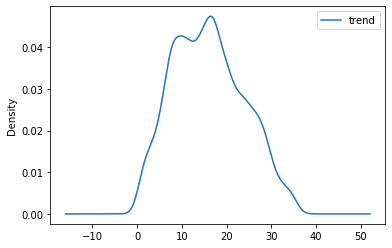

In [15]:
plt.hist(comp.trend, color="brown", edgecolor="black")
plt.title("Trend")
plt.show()

plt.boxplot(comp.trend)
plt.title("Trend")
plt.show()

pd.DataFrame(comp.trend).plot.density()
plt.show()

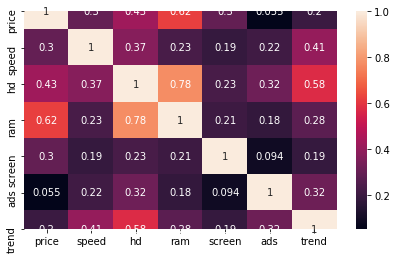

In [16]:
import seaborn as sns
plt.subplots(figsize=(7, 4))
correlationMatrix = comp.corr().abs()
sns.heatmap(correlationMatrix,annot=True)
plt.show()


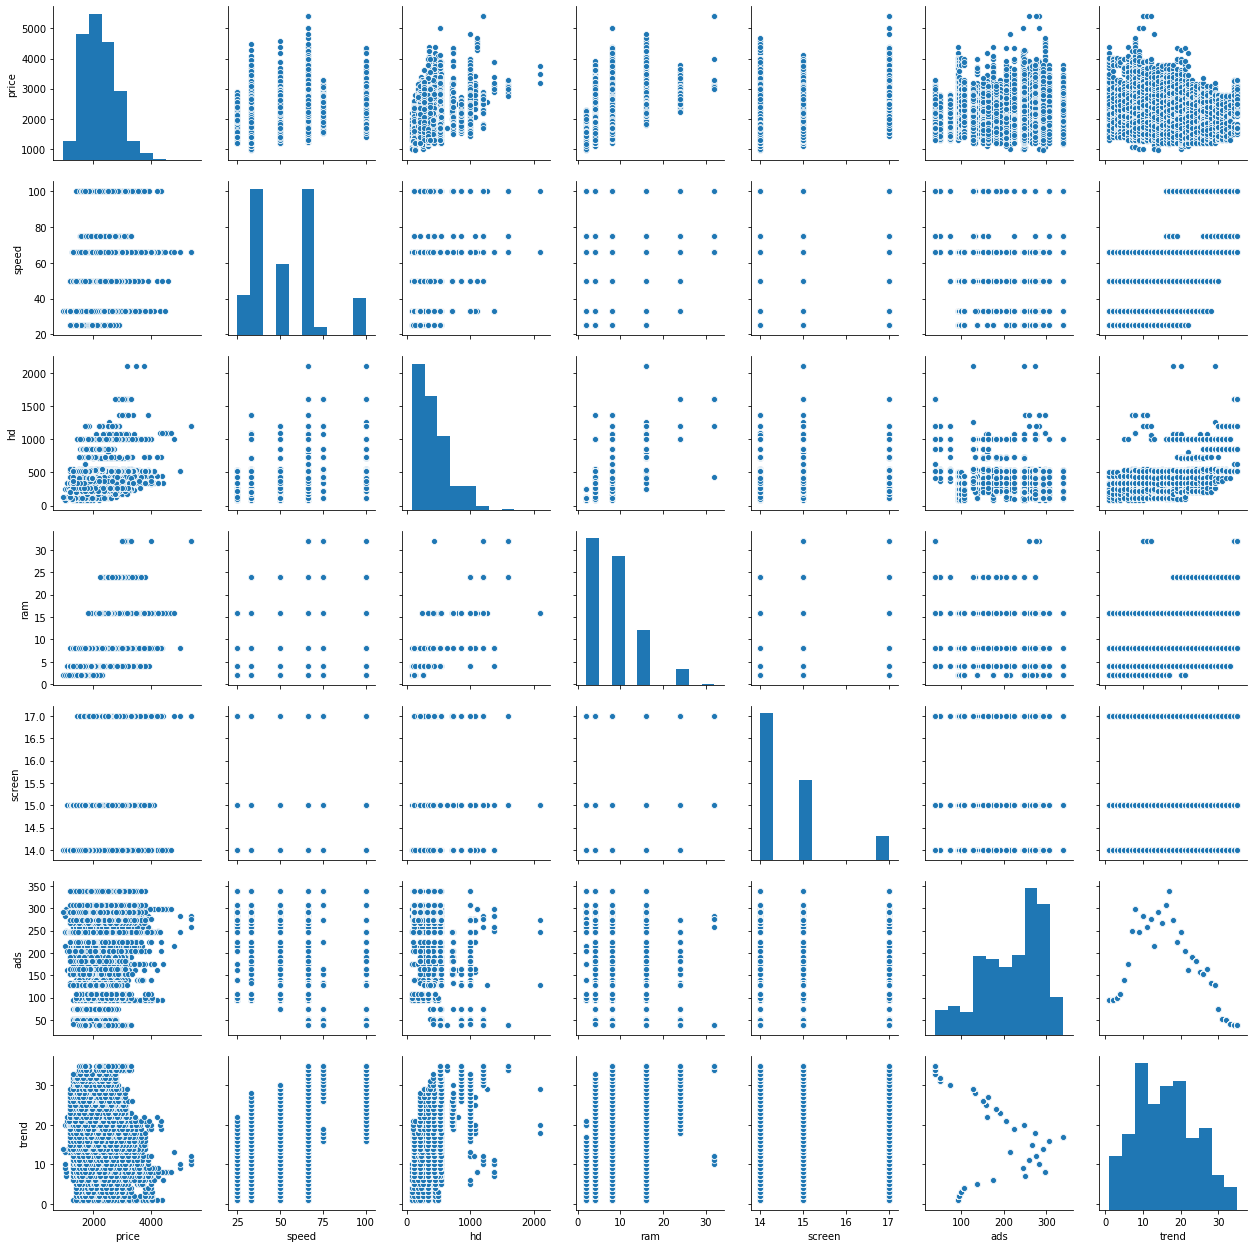

In [17]:
# Pairplots
sns.pairplot(comp)
plt.show()

In [18]:
# MODEL BUILDING
import statsmodels.formula.api as smf
model1 = smf.ols('price ~ speed+hd+ram+screen+ads+trend',data=comp).fit()

In [19]:
model1.params

Intercept   -246.675468
speed          8.893913
hd             0.708823
ram           47.387036
screen       126.702402
ads            0.969689
trend        -47.081967
dtype: float64

In [20]:
model1.summary()
#ram, screen, and ads have p value > 0.05

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     2580.
Date:                Wed, 13 May 2020   Prob (F-statistic):               0.00
Time:                        18:03:47   Log-Likelihood:                -44817.
No. Observations:                6259   AIC:                         8.965e+04
Df Residuals:                    6252   BIC:                         8.969e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -246.6755     66.371     -3.717      0.000    -376.785    -116.566
speed          8.8939      0.209     42.590      0.000       8.485       9.303
hd             0.7088      0.031     22.932      0.000       0.648       0.769
ram           47.3870      1.188     39.899      0.000      45.059      49.715
screen       126.7024      4.521     28.022      0.000     117.839     135.566
ads            0.9697      0.057     17.099      0.000       0.859       1.081
trend        -47.0820      0.676    -69.660      0.000     -48.407     -45.757
==============================================================================
Omnibus:                     1407.073   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3902.981
Skew:                           1.187   Prob(JB):                         0.00
Kurtosis:                       6.054   Cond. No.                     8.89e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

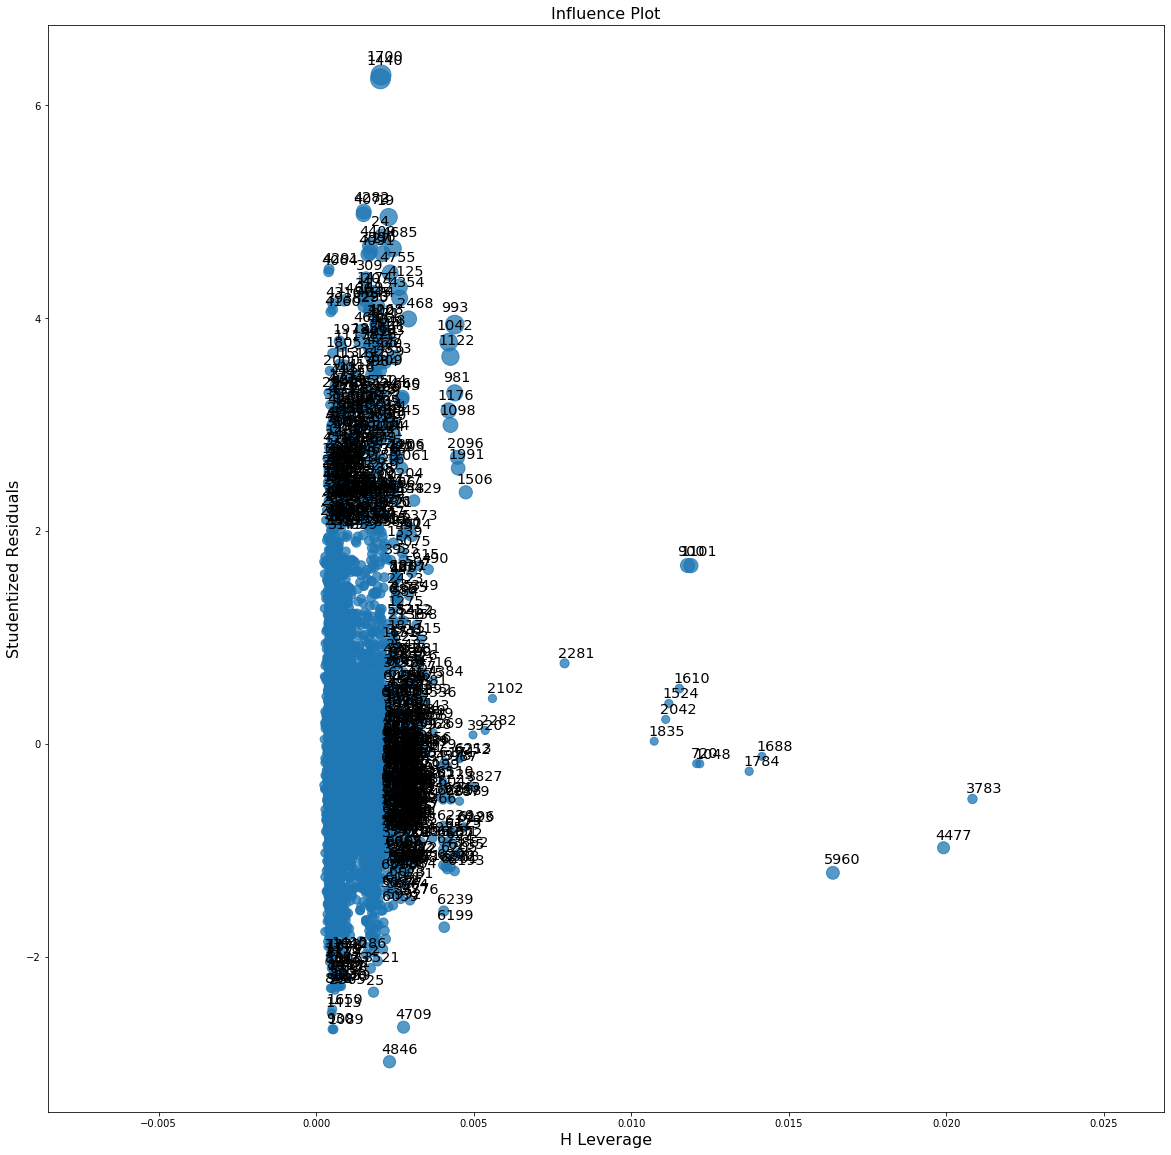

In [21]:
#Influence plot
import statsmodels.api as sm
fig, ax = plt.subplots(figsize=(20, 20))
fig = sm.graphics.influence_plot(model1, ax=ax,size=20)

In [22]:
# PREDICTED VALUES
pred = model1.predict(comp[['speed','hd','ram','screen','ads','trend']])
pred

0       2039.828804
1       2019.750147
2       2230.325295
3       2293.171038
4       2863.918575
           ...     
6254    1686.555807
6255    1991.500145
6256    2921.077584
6257    2293.893170
6258    2547.297975
Length: 6259, dtype: float64

In [23]:
# RESIDUALS
# RESIDUALS = Y(Hat)/predicted value - Y(original)
resid = pred- comp['price']
#resid.head()
resid

0       540.828804
1       224.750147
2       635.325295
3       444.171038
4      -431.081425
           ...    
6254     -3.444193
6255   -231.499855
6256    267.077584
6257     98.893170
6258     57.297975
Length: 6259, dtype: float64

In [24]:
# RMSE
rmse1 = np.sqrt(np.mean(resid*resid))
rmse1

311.5017500706836

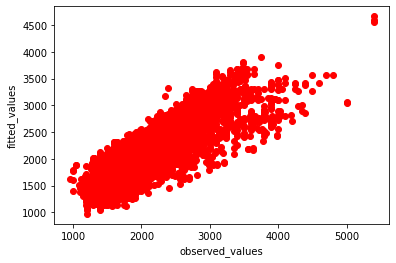

In [25]:
# Observed values(Y) VS Fitted values(Y(Hat))
plt.scatter(comp.price,pred,c="r")
plt.xlabel("observed_values")
plt.ylabel("fitted_values")
plt.show()

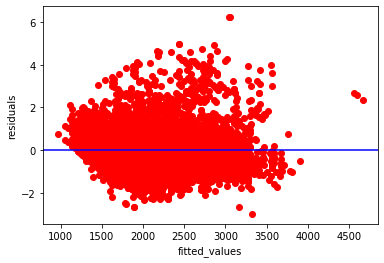

In [26]:
# Residuals VS Fitted Values 
plt.scatter(pred,model1.resid_pearson,c="r")
plt.axhline(y=0,color='blue')
plt.xlabel("fitted_values")
plt.ylabel("residuals")
plt.show()


In [ ]:
# LOG TRANSFORMATION   Y~log(x)
model_log = smf.ols('price ~ np.log(speed+hd+ram+screen+ads+trend)',data=comp).fit()
model_log.summary()

In [ ]:
pred1 = model_log.predict(comp[['speed','hd','ram','screen','ads','trend']])
pred1

In [ ]:
#resid1 = pred1-comp.price
resid1 = pred1- comp['price']
resid1


In [ ]:
rmse_log = np.sqrt(np.mean(resid1*resid1))
rmse_log

In [ ]:
# Observed values(Y) VS Fitted values
plt.scatter(comp.price,pred1,c="g")
plt.xlabel("observed_values")
plt.ylabel("fitted_values")
plt.show()


In [ ]:
# Residuals VS Fitted Values 
plt.scatter(pred1,model_log.resid_pearson,c="g")
plt.axhline(y=0,color='blue')
plt.xlabel("fitted_values")
plt.ylabel("residuals")
plt.show()


In [ ]:
# EXPONENTIAL TRANSFORMATION   log(Y)~x
model_exp = smf.ols('np.log(price) ~ speed+hd+ram+screen+ads+trend',data=comp).fit()
model_exp.summary()

In [ ]:
pred2 = model_exp.predict(comp[['speed','hd','ram','screen','ads','trend']])
pred2
pred3 = np.exp(pred2)
# as we have used log(AT) in preparing model so we need to convert it back
pred3


In [ ]:
resid3 = pred3 - comp.price
resid3


In [ ]:
rmse_log = np.sqrt(np.mean(resid2*resid2))
rmse_log

In [ ]:
# Observed values(Y) VS Fitted values
plt.scatter(comp.price,pred3,c="b")
plt.xlabel("observed_values")
plt.ylabel("fitted_values")
plt.show()


In [ ]:
# Residuals VS Fitted Values 
plt.scatter(pred,model_exp.resid_pearson,c="b")
plt.axhline(y=0,color='blue')
plt.xlabel("fitted_values")
plt.ylabel("residuals")
plt.show()


In [1]:
#MODEL NAME     R-Square   Adjust R-Square      AIC(least)    BIC(least)     Log-Likelihood(high)  RMSE    Accepted Model
#Model1         0.712      0.712                8.97E+04    8.97E+04          -44817             311.5       yes
#Model_log      0.21       0.21                 9.60E+04    9.60E+04         -47977             516.11       no
#Model_y(log)   0.716      0.716                 -7071       -7024           3542.4            2286.82       no